<h1 align = "center"><font color = "green">Task #3 - To Explore Unsupervised Machine Learning</font></h1>

<b>Objective: </b>From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In this task, I will be using k-means clustering algorithm to segment the Iris flower species based on there features. 

In [1]:
# Importing all the required libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Reading the Dataset
data = pd.read_csv("Iris.csv")

# Looking at the first 5 rows of the data
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Checking for any null values present in dataset
data.isnull().values.any()

False

Since 'Id' column is no use to us we are going to drop this column.

In [4]:
# Removing Id column from the dataset
iris_data = data.drop(['Id'], axis=1)
print(iris_data.columns)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


Let's create three dataframes for our species (Iris-setosa, Iris-versicolor & Iris-virginica) which we are going to use later on for our scatter plots.

In [5]:
#Creating DataFrame for each Species
setosa = data[iris_data['Species'] == 'Iris-setosa']
versicolor = data[iris_data['Species'] == 'Iris-versicolor']
virginica = data[iris_data['Species'] == 'Iris-virginica']

Now we will select all features (SepalLength, SepalWidth, PetalLength, PetalWidth) of our dataset in a variable called x, so that we can train our model with these selected features.

In [6]:
x = iris_data.iloc[:, [0, 1, 2, 3]].values

Now we will implement 'The Elbow Method' on the Iris dataset. The elbow method allows us to pick the optimum amount of clusters for classification (calculate the optimum value of k).

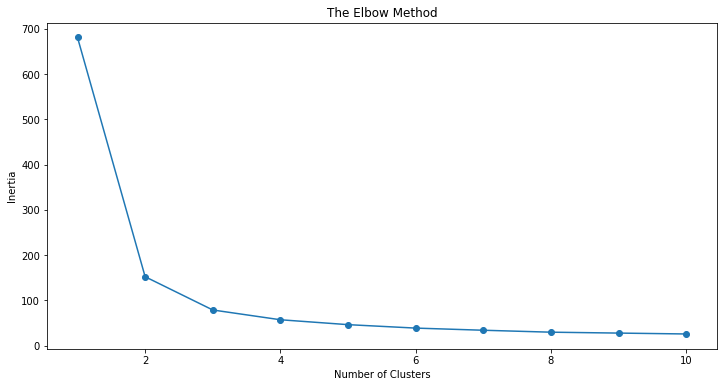

In [7]:
# Finding the optimum number of clusters for k-means classification
SSE = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(x)
    SSE.append(kmeans.inertia_)
    
# Plotting the results onto a line graph
frame = pd.DataFrame({'Cluster':range(1, 11), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

We can clearly see why it is called 'The Elbow Method' from the above graph, the optimum clusters is where the elbow occurs. At this point the within cluster sum of squares(inertia) doesn't decrease significantly with every iteration. 

As you can see, the optimal value of k is between 2 & 4, as the elbow-like shape is formed at k=3 in the above graph we will implement k-means using k=3.

In [8]:
# Implementing k-means clustering
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(x)

Finally, its time to visualize the three clusters that were formed with the optimal k value.

<h2>Visualising Clusters</h2>

<b>*This visualization is for Sepal Features (Sepal Length & Sepal Width)*</b>

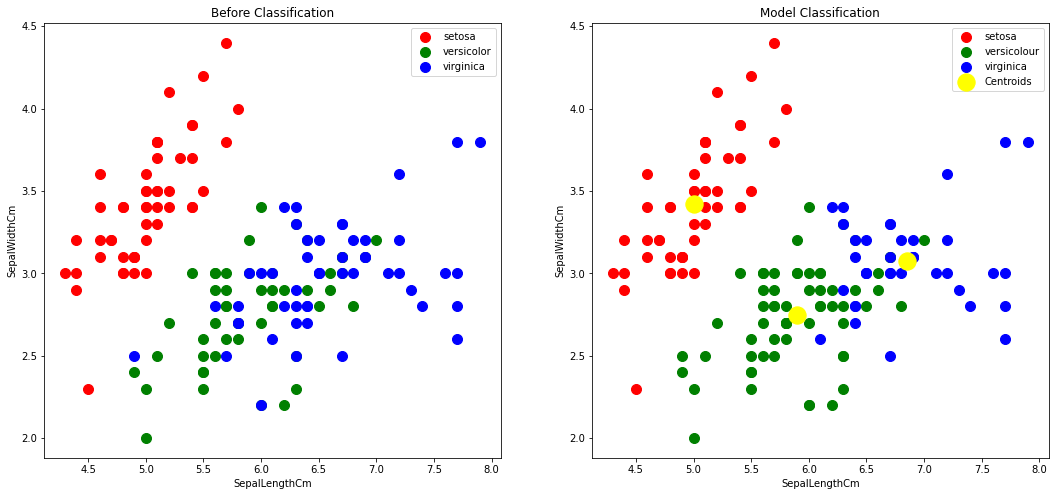

In [9]:
fig,ax=plt.subplots(1,2,figsize=(18, 8))

# Visualising clusters before fitting the model
setosa.plot(x="SepalLengthCm", y="SepalWidthCm", kind="scatter", s=100, ax=ax[0], color='r', label="setosa")
versicolor.plot(x="SepalLengthCm",y="SepalWidthCm", kind="scatter", s=100, ax=ax[0], color='g', label="versicolor")
virginica.plot(x="SepalLengthCm", y="SepalWidthCm", kind="scatter", s=100, ax=ax[0], color='b', label="virginica")
ax[0].set(title='Before Classification')

# Visualising clusters after fitting the model
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'setosa')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'versicolour')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'virginica')
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
ax[1].set(title='Model Classification')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

In the above graphs, we can clearly see that the red dots which represents Iris-setosa are grouped properly. Whereas, the green and blue dots representing Iris-versicolor & Iris-virginica respectively are not clearly separable. Which concludes that the Sepal Features does not differentiate the species in an optimum way.

<b>*This visualization is for Petal Features (Petal Length & Petal Width)*</b>

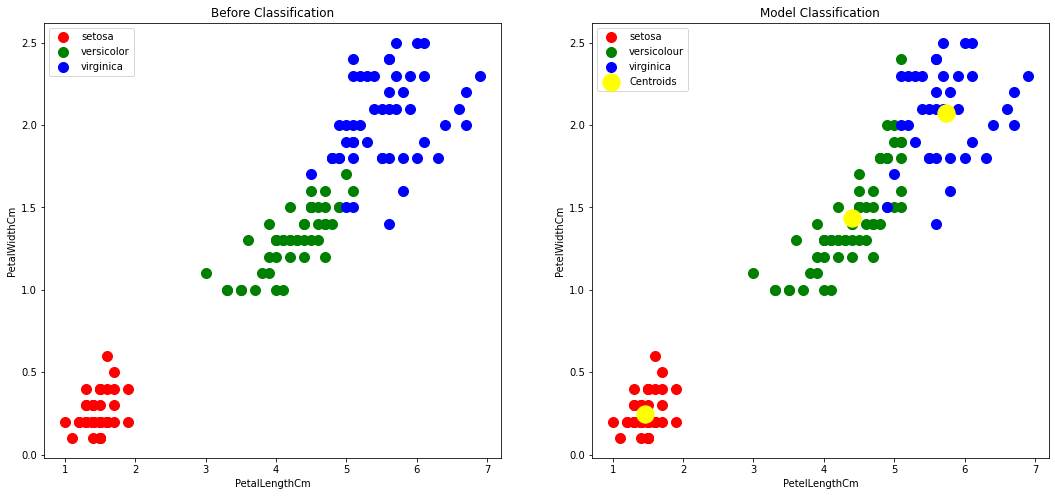

In [10]:
fig,ax=plt.subplots(1,2,figsize=(18, 8))

# Visualising clusters before fitting the model
setosa.plot(x="PetalLengthCm", y="PetalWidthCm", kind="scatter", s=100, ax=ax[0], color='r', label="setosa")
versicolor.plot(x="PetalLengthCm",y="PetalWidthCm", kind="scatter", s=100, ax=ax[0], color='g', label="versicolor")
virginica.plot(x="PetalLengthCm", y="PetalWidthCm", kind="scatter", s=100, ax=ax[0], color='b', label="virginica")
ax[0].set(title='Before Classification')

# Visualising the clusters after fitting the model
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 100, c = 'red', label = 'setosa')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s = 100, c = 'green', label = 'versicolour')
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 100, c = 'blue', label = 'virginica')
plt.xlabel("PetelLengthCm")
plt.ylabel("PetelWidthCm")
ax[1].set(title='Model Classification')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 300, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

In the above graphs, we can clearly see that the red dots which represents Iris-setosa are grouped properly giving 100% accuracy. And the green and blue dots representing Iris-versicolor & Iris-virginica respectively are fairly well grouped too. Which concludes that the Petal Features differentiates the species in an optimum way as compared to the Sepal Features.

For the conclusion, we can say that with the use of 'The Elbow Method' we can identify the best value of k i.e. the number of clusters. Since we already know the target values i.e. Iris-setosa, Iris-versicolour & Iris-virginica, it was easy for us to tell that the number of clusters are supposed to be 3 but with the use of Elbow Method we justified that the ideal optimal value for k is 3.